<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 9: Convolutional Neural Networks </h1>
    <h3></h3>
</center>

## <center> Case: MNIST on CNN

## Coding section
### Abstract:

<font face="Times New Roman">Consider the classification problem of the MNIST dataset.</font>

<font face="Times New Roman">1. Data processing: We load the MNIST dataset.</font>

<font face="Times New Roman">2. Model training and prediction: We develop a CNN based on PyTorch architecture and train it. Calculate the accuracy to evaluate the performance of these models.</font>
    
<font face="Times New Roman">3. Visualizing results: (1) Confusion Matrix. (2) The accuracy. </font>

### Problem Description:
    
<font face="Times New Roman">Implement an ANN with input layer, hidden layer, and output layer based on PyTorch architecture to classify MNIST datasets.


### 1. Data processing

In [1]:
# Load packages
from torchvision.datasets import MNIST # pip install torchvision
from torchvision.transforms import Compose,ToTensor,Normalize
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import os
import torch
import numpy as np
import matplotlib.pyplot as plt  

torch.manual_seed(42)
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

print(torch.cuda.is_available())

False


In [2]:
# Set the batch size and the test size
BATCH_SIZE = 100
TEST_BATCH_SIZE = 100

#Prepare the dataset
def get_dataloader(Train=True, batch=BATCH_SIZE):
    
    transform_fn = Compose([
        ToTensor(),
        Normalize(mean = (0.1307,),std = (0.3081,))
        ])
    
    dataset = MNIST(root = './data', train = Train, transform = transform_fn)  # download=True
    data_loader = DataLoader(dataset, batch_size = batch, shuffle = True)
    
    return data_loader

train_loader = get_dataloader(Train = True, batch = BATCH_SIZE)  #Get Train Data Loader
test_loader = get_dataloader(Train = False, batch = TEST_BATCH_SIZE)  #Get Test Data Loader

In [3]:
# View the data size
train_data = MNIST(root = './data',train = True, transform = ToTensor())
test_data = MNIST(root = './data',train = False, transform = ToTensor())

print(train_data)
print(test_data)
print(train_data.data.size())
print(train_data.targets.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
torch.Size([60000])


### 2. Model training and prediction

In [8]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()

        # Fill in the blanks
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )        
        
        self.FC1 = nn.Linear(32 * 6 * 6,256)
        self.FC2 = nn.Linear(256, 10)
        
    def forward(self, x):
        
        # Fill in the blanks
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.FC1(x))
        output = self.FC2(x)
        
        return output

In [9]:
Model = Mnist_CNN().to(device)

print(Model)

print('# Model parameters:', sum(param.numel() for param in Model.parameters()))

Mnist_CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (FC1): Linear(in_features=1152, out_features=256, bias=True)
  (FC2): Linear(in_features=256, out_features=10, bias=True)
)
# Model parameters: 302794


In [10]:
Criterion = nn.CrossEntropyLoss()
Optimizer = Adam(Model.parameters(),lr = 0.0001)

In [11]:
EPOCH = 10
train_loss = []
train_acc = []
test_loss = []
test_acc  = []

for epoch in range(EPOCH):
    
    train_loss_sum, test_loss_sum, train_num, test_num, train_i, test_i = 0.0, 0.0, 0, 0, 0, 0
    train_acc_sum,test_acc_sum = 0, 0
    TEST_acc_sum = 0
    
    for i_1, train_data in enumerate(train_loader):
        
        inputs, labels = train_data   
        inputs = inputs.type(torch.FloatTensor)
        inputs = inputs.to(device)
        
        labels = labels.long()
        labels = labels.to(device)
        
        # Fill in the blanks
        Model.train()
        pre_labs = Model(inputs)
        Loss = Criterion(pre_labs, labels)
        Optimizer.zero_grad()
        Loss.backward()
        Optimizer.step()
        
        train_loss_sum += Loss.item()
        train_acc_sum += (pre_labs.argmax(dim=1) == labels).sum().item()
        train_num += labels.shape[0]
        train_i += 1

    pred_list = []
    target_list = []
    for i_2, data in enumerate(test_loader):
        with torch.no_grad():

            test_data, test_lab = data  
            test_data = test_data.type(torch.FloatTensor)
            test_data = test_data.to(device)
            
            test_lab = test_lab.long()
            test_lab = test_lab.to(device)
            
            target_list.append(test_lab.view(-1).tolist())

            # Fill in the blanks
            Model.eval()
            pre_test = Model(test_data)
            pred_lab = pre_test.argmax(dim=1)
            
            pred_list.append(pred_lab.view(-1).tolist())
            
            t_loss = Criterion(pre_test, test_lab)

            test_loss_sum += t_loss    
            test_acc_sum += (pred_lab == test_lab).sum().item()
            test_num += test_lab.shape[0]                    
            test_i += 1
       
    Train_Loss = train_loss_sum/train_i
    Test_Loss = test_loss_sum/test_i
    Train_ACC = train_acc_sum/train_num
    Test_ACC = test_acc_sum/test_num

    print('Epoch:%d, train_loss:%.5f, train_acc:%.5f, test_loss:%.5f, test_acc:%.5f' % 
          (epoch, Train_Loss, Train_ACC, Test_Loss, Test_ACC))
    print('-----------------------------------------------')

    train_loss.append(Train_Loss)            
    train_acc.append(Train_ACC) 
    test_loss.append(Test_Loss) 
    test_acc.append(Test_ACC)       

print("Finished Training")

Epoch:0, train_loss:0.51740, train_acc:0.87045, test_loss:0.16677, test_acc:0.95070
-----------------------------------------------
Epoch:1, train_loss:0.13805, train_acc:0.96000, test_loss:0.09772, test_acc:0.97140
-----------------------------------------------
Epoch:2, train_loss:0.09161, train_acc:0.97345, test_loss:0.06925, test_acc:0.97940
-----------------------------------------------
Epoch:3, train_loss:0.07157, train_acc:0.97885, test_loss:0.05888, test_acc:0.98220
-----------------------------------------------
Epoch:4, train_loss:0.06044, train_acc:0.98195, test_loss:0.04791, test_acc:0.98450
-----------------------------------------------
Epoch:5, train_loss:0.05205, train_acc:0.98483, test_loss:0.04390, test_acc:0.98640
-----------------------------------------------
Epoch:6, train_loss:0.04635, train_acc:0.98615, test_loss:0.03827, test_acc:0.98770
-----------------------------------------------
Epoch:7, train_loss:0.04071, train_acc:0.98808, test_loss:0.03571, test_acc:

In [12]:
y_test = np.array(target_list).flatten()
y_pred = np.array(pred_list).flatten()
print('train_acc:')
print(train_acc)
print('----------------------------------------')

print('test_acc:')
print(test_acc)
print('----------------------------------------')

train_acc:
[0.87045, 0.96, 0.97345, 0.97885, 0.98195, 0.9848333333333333, 0.98615, 0.9880833333333333, 0.9884333333333334, 0.98985]
----------------------------------------
test_acc:
[0.9507, 0.9714, 0.9794, 0.9822, 0.9845, 0.9864, 0.9877, 0.9883, 0.9896, 0.9876]
----------------------------------------


### 3. Visualizing results

### 3.1 Confusion Matrix

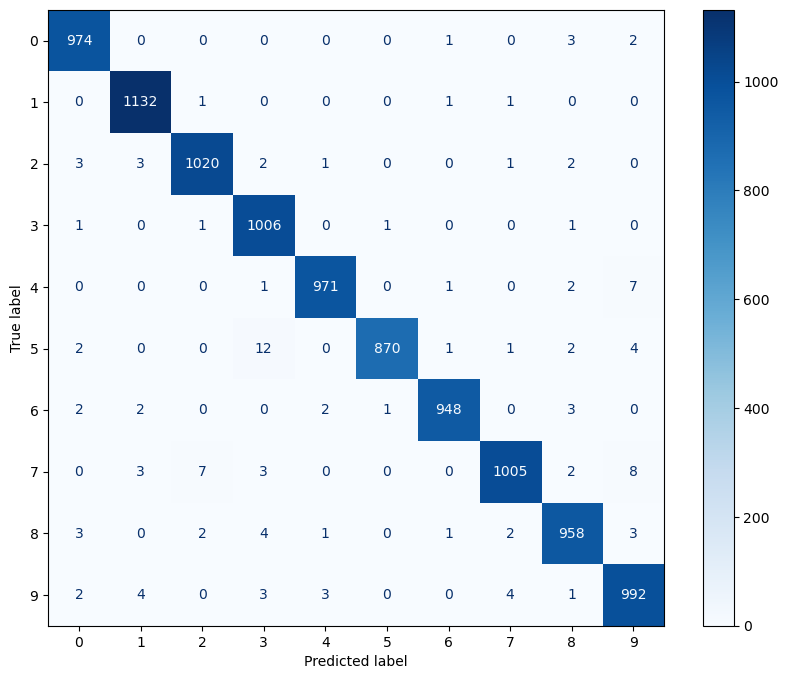

In [13]:
# Load Python packages for Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix
fig,ax = plt.subplots(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred, labels = np.arange(0,10,1))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=np.arange(0,10,1)
)
disp.plot(ax=ax, cmap = 'Blues')
plt.show()


### 3.2 Plot the accuracy

Text(0.5, 0, 'Iteration')

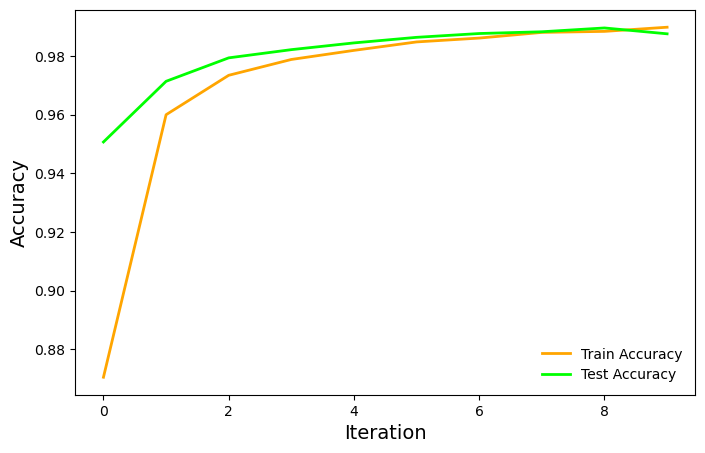

In [ ]:
X_epoch = np.arange(EPOCH)

fig = plt.figure(figsize=(8, 5))
sub = fig.add_subplot(111)
sub.plot(X_epoch, train_acc, c='orange', label='Train Accuracy',linewidth=2)
sub.plot(X_epoch, test_acc, c='lime', label='Test Accuracy',linewidth=2)

plt.legend(loc=4, edgecolor='w')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Iteration',fontsize=14)
